In [21]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import logging
import xgboost as xgb


In [22]:
logging.basicConfig(level=logging.INFO)

In [23]:
input_csv = '../model_training/csv/output.csv'
df = pd.read_csv(input_csv)
logging.info(df.head())

INFO:root:   id                                               text  class
0   1  accountant summary financial accountant specia...      0
1   2  staff accountant summary highly analytical det...      0
2   3  accountant professional summary obtain positio...      0
3   4  senior accountant experience company june 2011...      0
4   5  senior accountant professional summary senior ...      0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.1, random_state=None)

In [25]:
def train_naive_bayes(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = MultinomialNB()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [26]:
def train_random_forest(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = RandomForestClassifier()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [27]:
def train_bernoulli(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = BernoulliNB()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [28]:
def train_logistic_regression(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [71]:
def train_knn(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = KNeighborsClassifier(n_neighbors=9)
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [30]:
def train_xgboost(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = xgb.XGBClassifier()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [46]:
def plot_accuracies(accuracies):
  models = list(accuracies.keys())
  acc_values = list(accuracies.values())
  cmap = plt.cm.tab10 
  colors = cmap(np.arange(len(models)) % cmap.N)
  plt.figure(figsize=(10, 8))
  bars = plt.bar(models, acc_values, color=colors)
  for bar, acc in zip(bars, acc_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=8)
  plt.ylabel('Accuracies')
  plt.ylim([0, 1])
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [72]:
knn_accuracy = train_knn(X_train, y_train, X_test, y_test)
nb_accuracy = train_naive_bayes(X_train, y_train, X_test, y_test)
rf_accuracy = train_random_forest(X_train, y_train, X_test, y_test)
lr_accuracy = train_logistic_regression(X_train, y_train, X_test, y_test)
br_accuracy = train_bernoulli(X_train, y_train, X_test, y_test)
xg_accuracy = train_xgboost(X_train, y_train, X_test, y_test)

In [73]:
accuracies = {
    'Naive Bayes': nb_accuracy,
    'Random Forest': rf_accuracy,
    'Logistic Regression': lr_accuracy,
    'Bernoulli': br_accuracy,
    'KNN = 9': knn_accuracy,
    'XGBoost': xg_accuracy
}

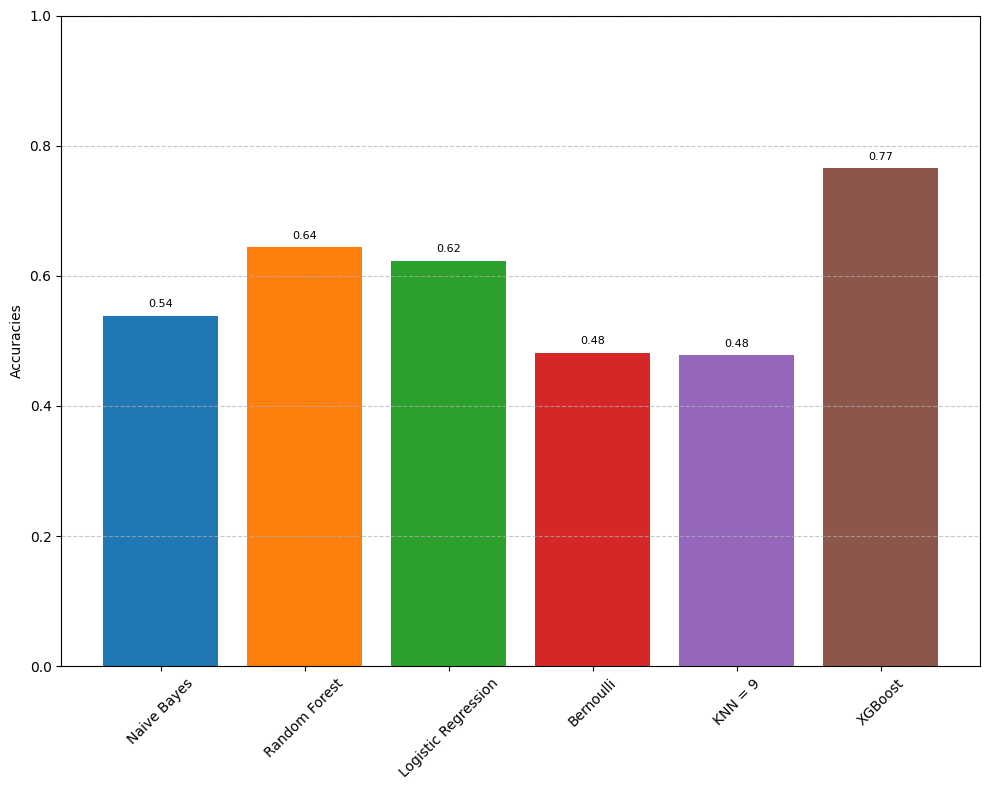

In [74]:
plot_accuracies(accuracies)

In [35]:
def train_knn_multiple_n(X_train, y_train, X_test, y_test, n_neighbors_list):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    
    accuracies = []
    
    for n in n_neighbors_list:
        clf = KNeighborsClassifier(n_neighbors=n)
        clf.fit(X_train_counts, y_train)
        y_pred = clf.predict(X_test_counts)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    return accuracies

In [52]:

def plot_accuraciesK(n_neighbors_list, accuracies):
    plt.figure(figsize=(10, 6))
    plt.plot(n_neighbors_list, accuracies, marker='o')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('KNN')
    plt.grid(True)
    plt.show()

In [69]:
n_neighbors_list = [1, 3, 5, 7, 9, 11, 13, 15]
accuraciesK = train_knn_multiple_n(X_train, y_train, X_test, y_test, n_neighbors_list)


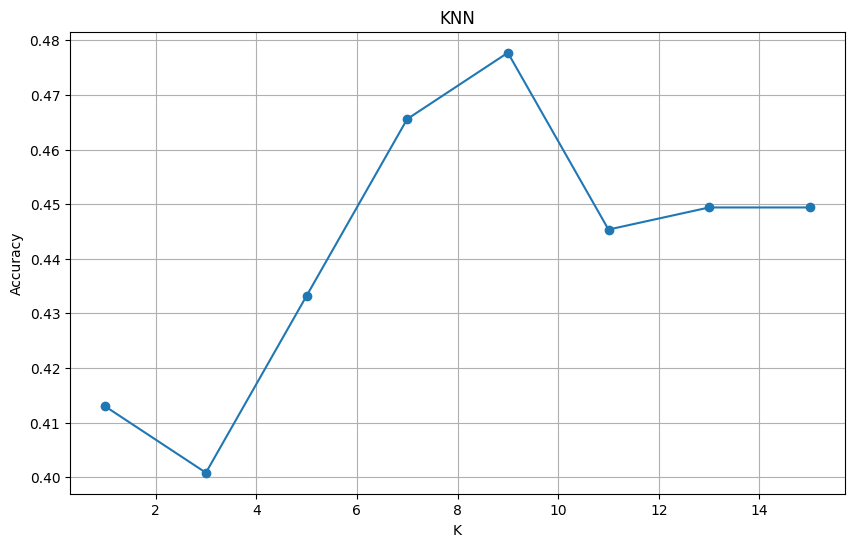

In [70]:
plot_accuraciesK(n_neighbors_list, accuraciesK)